In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
final_data = "dataset.csv"
final_data = pd.read_csv(final_data)

In [ ]:
# Chia dữ liệu thành train/test
X = final_data.drop(columns=['URL_Type_obf_Type'])  # Loại bỏ nhãn
y = final_data['URL_Type_obf_Type']

In [ ]:
X = X.astype(np.float64)

In [ ]:
# Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Chuẩn hóa dữ liệu cho các mô hình học sâu
scaler = StandardScaler()

# Kiểm tra và thay thế các giá trị vô cùng bằng NaN trong X_train
X_train = X_train.replace([np.inf, -np.inf], np.nan)
# Thay thế NaN bằng giá trị trung bình của cột trong X_train
X_train = X_train.fillna(X_train.mean())

# fit_transform trên X_train sau khi xử lý dữ liệu
X_train_scaled = scaler.fit_transform(X_train)

# Áp dụng cùng bước xử lý cho X_test
# Kiểm tra và thay thế các giá trị vô cùng bằng NaN trong X_test
X_test = X_test.replace([np.inf, -np.inf], np.nan)
# Thay thế NaN bằng giá trị trung bình của cột trong X_test (sử dụng mean của X_train)
X_test = X_test.fillna(X_train.mean())

# transform X_test sau khi xử lý dữ liệu
X_test_scaled = scaler.transform(X_test)

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Khởi tạo và huấn luyện
lr_model = LogisticRegression(random_state=42, max_iter=500)
lr_model.fit(X_train, y_train)

# Đánh giá
y_pred_lr = lr_model.predict(X_test)
print("\nLogistic Regression:")
print(classification_report(y_test, y_pred_lr))



Logistic Regression:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78      1586
           1       0.79      0.87      0.83      1556
           2       0.75      0.60      0.67      1343
           3       0.77      0.85      0.80      1517
           4       0.87      0.85      0.86      1340

    accuracy                           0.79      7342
   macro avg       0.79      0.79      0.79      7342
weighted avg       0.79      0.79      0.79      7342



**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Khởi tạo và huấn luyện
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Đánh giá
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest:")
print(classification_report(y_test, y_pred_rf))



Random Forest:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1586
           1       0.98      0.99      0.98      1556
           2       1.00      0.98      0.99      1343
           3       0.94      0.96      0.95      1517
           4       0.99      0.97      0.98      1340

    accuracy                           0.98      7342
   macro avg       0.98      0.98      0.98      7342
weighted avg       0.98      0.98      0.98      7342



**XGBoost**

In [ ]:
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder on the training labels and transform both train and test labels
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Now you can train your XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_xgb = xgb_model.predict(X_test)
print("\nXGBoost:")
print(classification_report(y_test, y_pred_xgb))


XGBoost:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1586
           1       0.98      0.99      0.99      1556
           2       0.99      0.99      0.99      1343
           3       0.96      0.97      0.97      1517
           4       1.00      0.98      0.99      1340

    accuracy                           0.98      7342
   macro avg       0.98      0.98      0.98      7342
weighted avg       0.98      0.98      0.98      7342



**Deep Learning**

**MLP**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Tạo kiến trúc mạng
mlp_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(y.unique()), activation='softmax')  # Lớp đầu ra
])

# Compile mô hình
mlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Huấn luyện
mlp_model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_test_scaled, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
918/918 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.6689 - loss: 0.8812 - val_accuracy: 0.8713 - val_loss: 0.3837
Epoch 2/20
918/918 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8276 - loss: 0.4858 - val_accuracy: 0.8965 - val_loss: 0.3068
Epoch 3/20
918/918 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8607 - loss: 0.3961 - val_accuracy: 0.9063 - val_loss: 0.2713
Epoch 4/20
918/918 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8749 - loss: 0.3469 - val_accuracy: 0.9143 - val_loss: 0.2495
Epoch 5/20
918/918 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8845 - loss: 0.3240 - val_accuracy: 0.9200 - val_loss: 0.2321
Epoch 6/20
918/918 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8945 - loss: 0.3054 - val_accuracy: 0.9266 - val_loss: 0.2140
Epoch 7/20
918/918 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9028 - loss: 0.2831 - val_accuracy: 0.9307 - val_loss: 0.2099
Epoch 8/20
918/918 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9057 - loss: 0.2677 - val_accuracy: 

**LSTM**

In [ ]:
from tensorflow.keras.layers import Embedding, LSTM, Flatten

# Tạo mô hình RNN/LSTM
lstm_model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=X_train_scaled.shape[1]),  # Embedding layer
    LSTM(128, return_sequences=False),
    Dense(64, activation='relu'),
    Dense(len(y.unique()), activation='softmax')
])

# Compile mô hình
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Huấn luyện
lstm_model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_test_scaled, y_test))


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


918/918 ━━━━━━━━━━━━━━━━━━━━ 181s 192ms/step - accuracy: 0.4547 - loss: 1.2886 - val_accuracy: 0.7208 - val_loss: 0.7644
Epoch 2/20
918/918 ━━━━━━━━━━━━━━━━━━━━ 180s 169ms/step - accuracy: 0.7588 - loss: 0.6842 - val_accuracy: 0.8006 - val_loss: 0.5597
Epoch 3/20
918/918 ━━━━━━━━━━━━━━━━━━━━ 205s 172ms/step - accuracy: 0.8145 - loss: 0.5224 - val_accuracy: 0.8325 - val_loss: 0.4759
Epoch 4/20
918/918 ━━━━━━━━━━━━━━━━━━━━ 187s 156ms/step - accuracy: 0.8456 - loss: 0.4306 - val_accuracy: 0.8581 - val_loss: 0.4102
Epoch 5/20
918/918 ━━━━━━━━━━━━━━━━━━━━ 202s 156ms/step - accuracy: 0.8637 - loss: 0.3846 - val_accuracy: 0.8682 - val_loss: 0.3854
Epoch 6/20
918/918 ━━━━━━━━━━━━━━━━━━━━ 204s 158ms/step - accuracy: 0.8754 - loss: 0.3545 - val_accuracy: 0.8758 - val_loss: 0.3679
Epoch 7/20
918/918 ━━━━━━━━━━━━━━━━━━━━ 212s 169ms/step - accuracy: 0.8874 - loss: 0.3171 - val_accuracy: 0.8834 - val_loss: 0.3518
Epoch 8/20
918/918 ━━━━━━━━━━━━━━━━━━━━ 193s 158ms/step - accuracy: 0.8967 - loss: 0.28

In [ ]:
print("y_test type:", type(y_test[0])) # Use array indexing instead of iloc
print("y_pred type:", type(y_pred_lr[0]))

y_test type: <class 'numpy.int64'>
y_pred type: <class 'numpy.int64'>


In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
le = LabelEncoder()
le.fit(y_pred_lr) # Fit the LabelEncoder to your predictions or the original training labels (y_train)
y_pred_encoded = le.transform(y_pred_lr)  # Now you can transform y_pred_lr


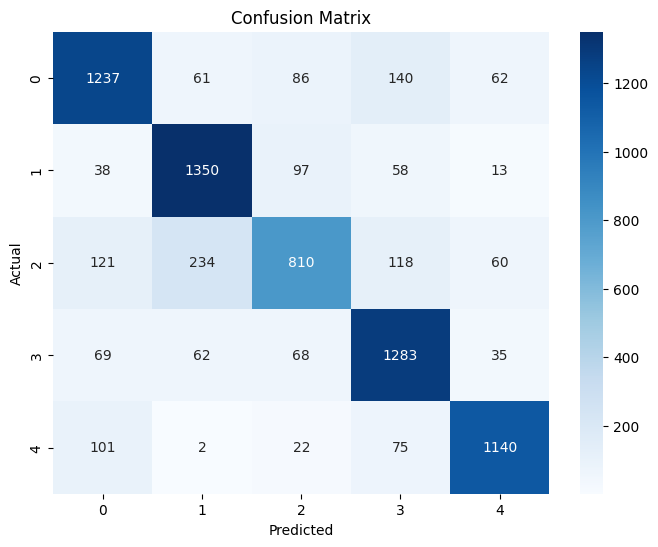

In [ ]:
!pip install seaborn
import seaborn as sns
# Tạo và vẽ ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred_encoded)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()